# Final Project
# Credit Card Fraud Prediction models
### By Ashna Naswa

## About the Project

This project is made to detect credit card fraud. This application can marketed to the financial sector.


Two models have been selected to detect credit card fraud. Those models are:

K-Nearest Neighbors Model

Logistic Regression

### Why detect credit card frauds?

Credit card fraud is running rampant and affecting millions of cardholders across the globe.
While individual victims are usually able to recover their stolen money via reimbursement and chargebacks, the merchants on the other end of the fraudulent purchases are often left hanging. 
The reality is that credit card thieves and fraudsters are rarely caught, and even when they are caught they don’t usually have the funds necessary to pay back the costs that they’ve incurred. Because of this, credit card fraud often impacts merchants more than the individual victim when all is said and done.

### Advantages of credit card fraud detection

- Improved credit card fraud detection rate while keeping false alarms at low level.

- Increased protection of your customers.

- Real-time detection – immediate action can be taken to prevent fraudulent transactions.

- Easy integration with your existing solutions through APIs.

### Results

Logistic Regression model was more accurate than KNN model. This was concluded by looking at the confusion matrix of both models.

### Other benefits

- It can help detect any bank transaction fraud.

## Loading necessary libraries

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import time
import itertools
from sklearn.metrics import precision_recall_fscore_support,recall_score,accuracy_score

## Loading dataset

In [2]:
df= pd.read_csv('creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Looking for Missing Values

In [3]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No values were missing.

### Checking if the dataset is balanced

<AxesSubplot:xlabel='Class', ylabel='count'>

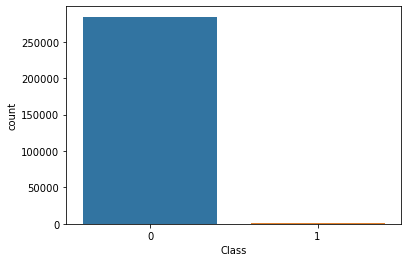

In [4]:
sns.countplot(x='Class',data=df)

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

There are very few cases of fraud in the dataset. It may effect the result of the accuracy but I am going to avoid that as much as I can.

In [42]:
#Changing the data type of Class

df['Class'] = df['Class'].astype('category')

#Renaming the classes
df['Class'] = df['Class'].cat.rename_categories({1:'Fraudulent',0:'Non_Fraudulent'})

df['Class']

0         Non_Fraudulent
1         Non_Fraudulent
2         Non_Fraudulent
3         Non_Fraudulent
4         Non_Fraudulent
               ...      
284802    Non_Fraudulent
284803    Non_Fraudulent
284804    Non_Fraudulent
284805    Non_Fraudulent
284806    Non_Fraudulent
Name: Class, Length: 284807, dtype: category
Categories (2, object): ['Non_Fraudulent', 'Fraudulent']

In [43]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
print(normal_share)
fraud_share=classes[1]/df['Class'].count()*100
print(fraud_share)

99.82725143693798
0.1727485630620034


In [44]:
#Creating a df for percentage of each class
class_share = {'Class':['fraudulent','non_fraudulent'],'Percentage':[fraud_share,normal_share]}
class_share = pd.DataFrame(class_share)
class_share.head()

,Class,Percentage
0,fraudulent,0.172749
1,non_fraudulent,99.827251


The data is imbalanced since there are only 0.17% of fraudulent cases.

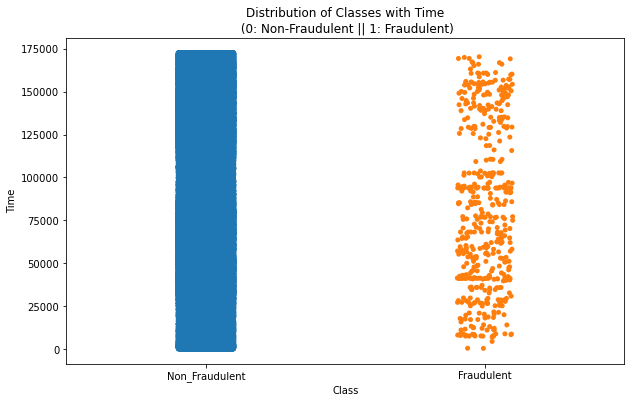

In [45]:
# Create a scatter plot to observe the distribution of classes with time
#sns.set_palette("muted")
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Time',data=df)
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

Insight:

From the above plot we observe that there isn't any particular time interval at which fraudulent transactions happen. It can happen at any time.

The Time column is evenly distributed for fraudulent transactions and doesn't seem to have any role in deciding whether a transaction is fraud or not.

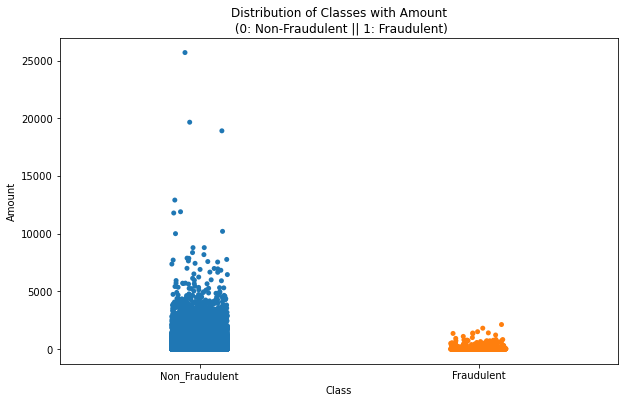

In [46]:
# Create a scatter plot to observe the distribution of classes with Amount
plt.figure(figsize=(10,6))
sns.stripplot(x= 'Class', y= 'Amount',data=df)
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')
plt.show()

Insight:

The fraudulent transactions do not have any high amount transactions. The maximum amount for a fraudulent transaction is somewhere around $2500.

In [57]:
df['Amount'].sum()

25162590.009999998

### Total Amount in all transactions: $25,162,590

In [54]:
df.loc[df['Class'] == "Fraudulent", 'Amount'].sum()

60127.97

### Total Amount of fraudulent transactions: $60,127.97

In [62]:
print("Fraudulent")
print(df.Amount[df.Class==1].describe())

Fraudulent
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


## Exploring Dataset

In [55]:
df= pd.read_csv('creditcard.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.shape

(284807, 31)

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.corr().nlargest(31,'Class')['Class'] # Single Column correlation

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

### Visual of the data

<AxesSubplot:>

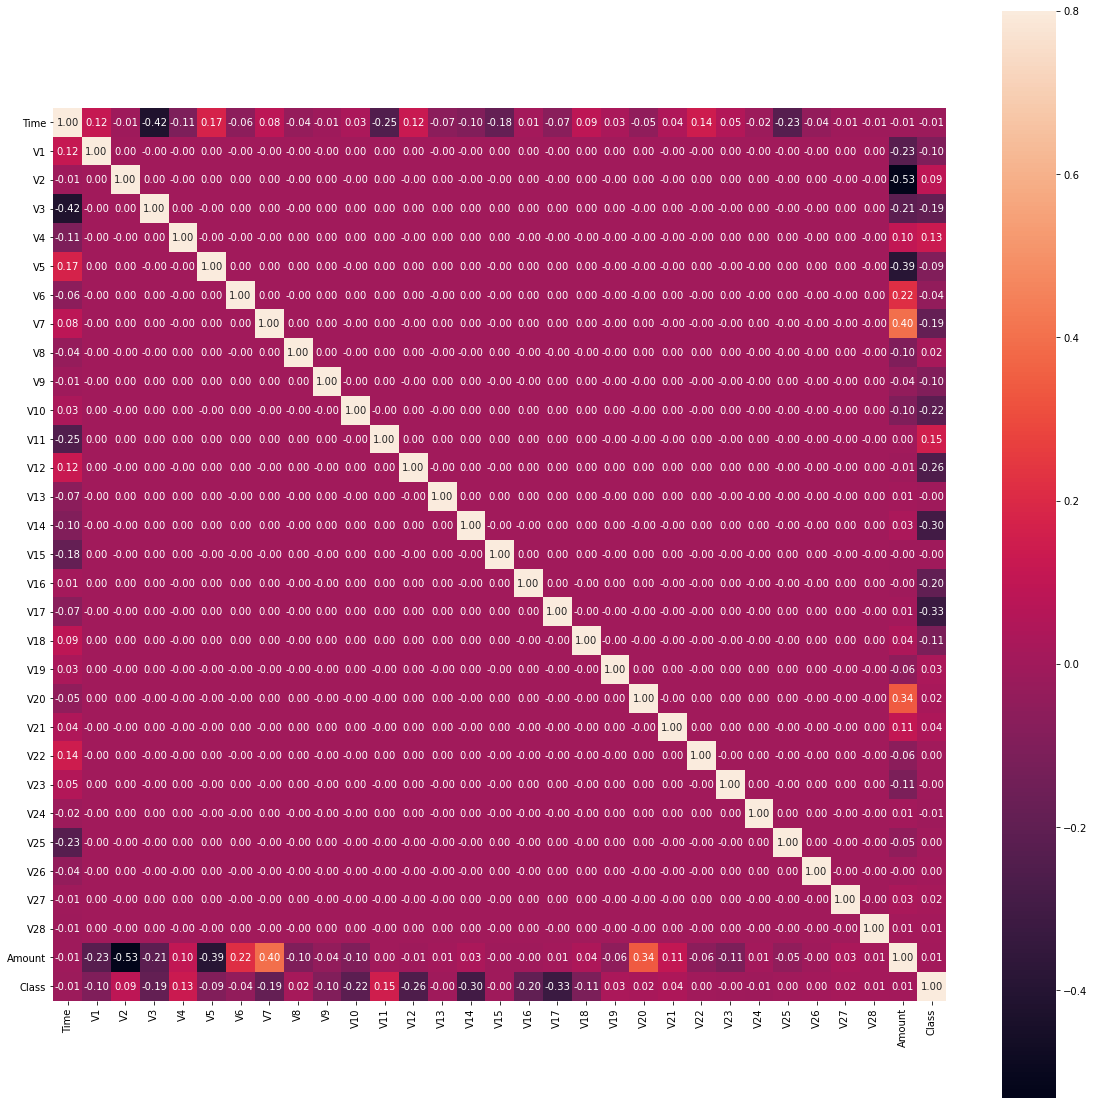

In [10]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), vmax=.8 , square=True,annot=True,fmt='.2f')

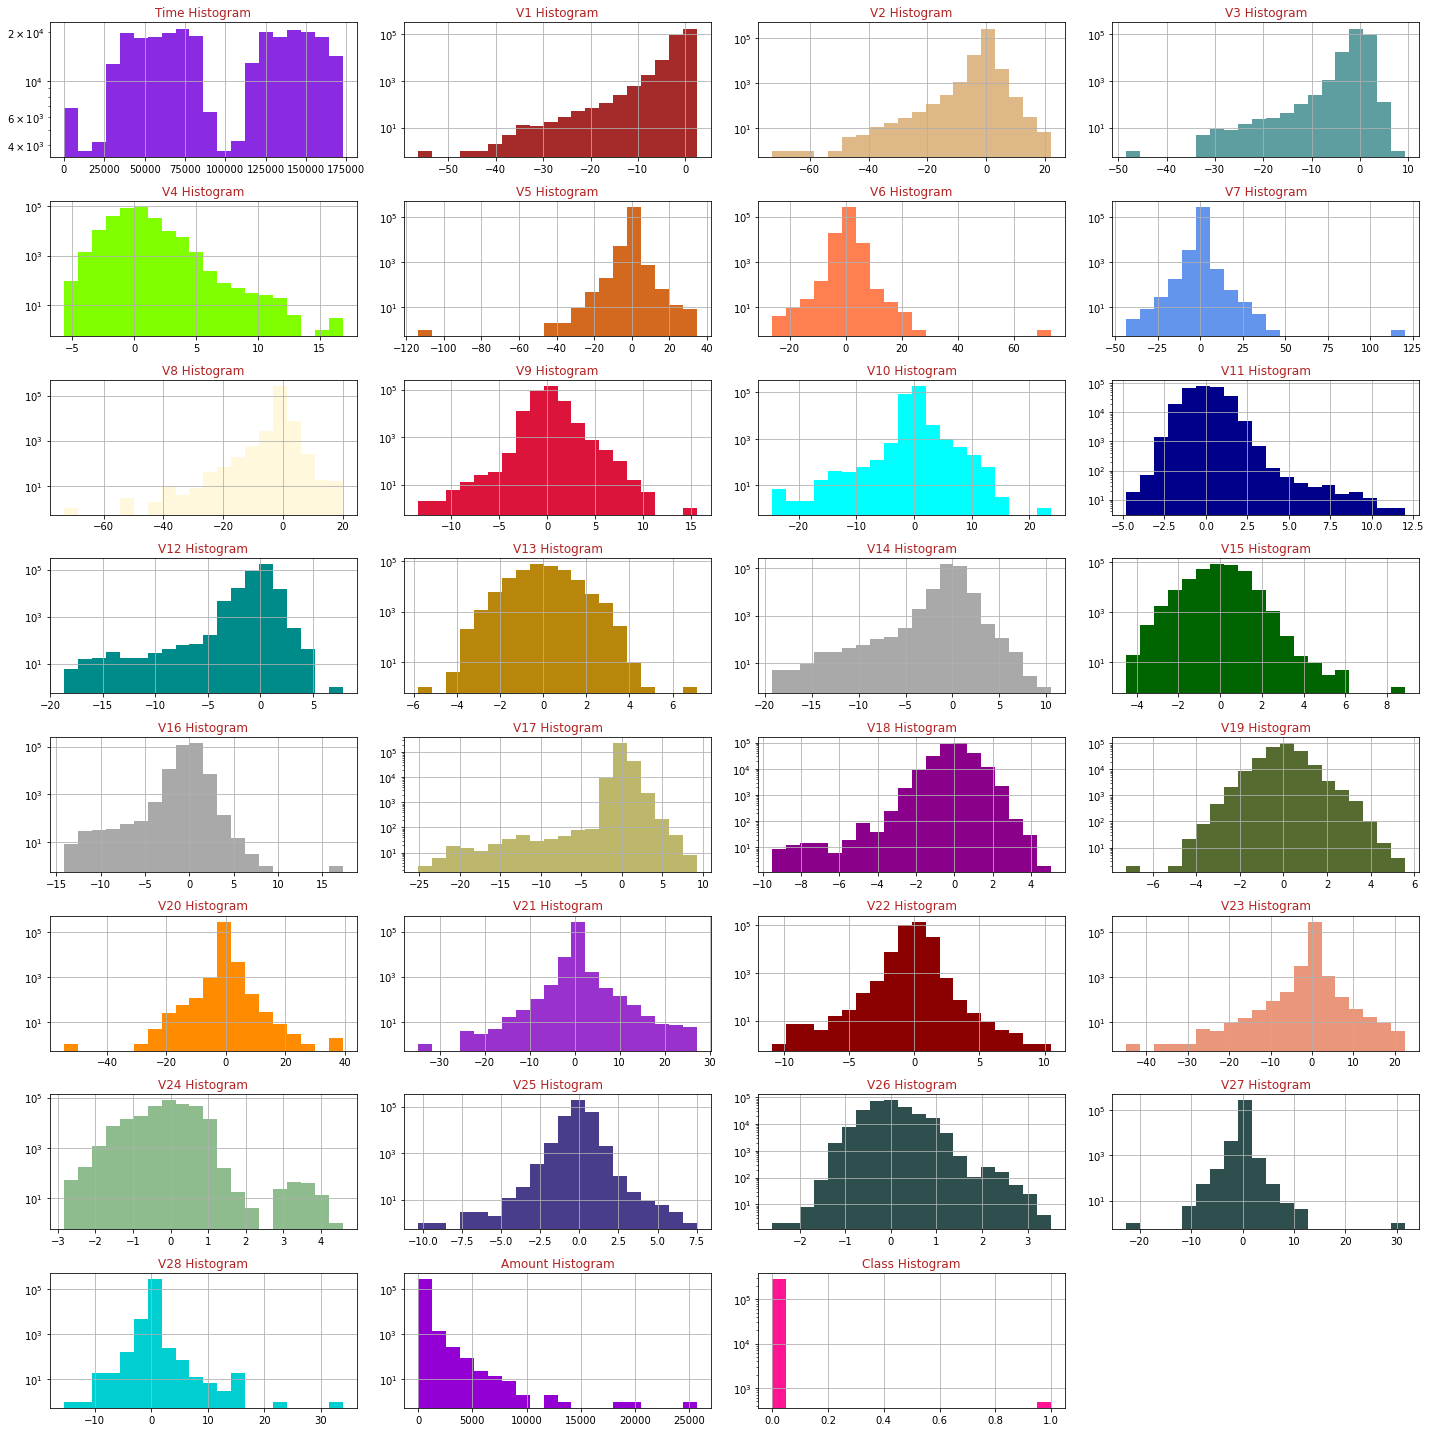

In [11]:
import matplotlib.colors as mcolors
colors = list(mcolors.CSS4_COLORS.keys())[10:]
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor=colors[i])
        ax.set_title(feature+" Histogram",color=colors[35])
        ax.set_yscale('log')
    fig.tight_layout() 
    plt.savefig('Histograms.png')
    plt.show()
draw_histograms(df,df.columns,8,4)

### Checking feature distribustion

/Users/ashnanaswa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ashnanaswa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/ashnanaswa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

<Figure size 432x288 with 0 Axes>

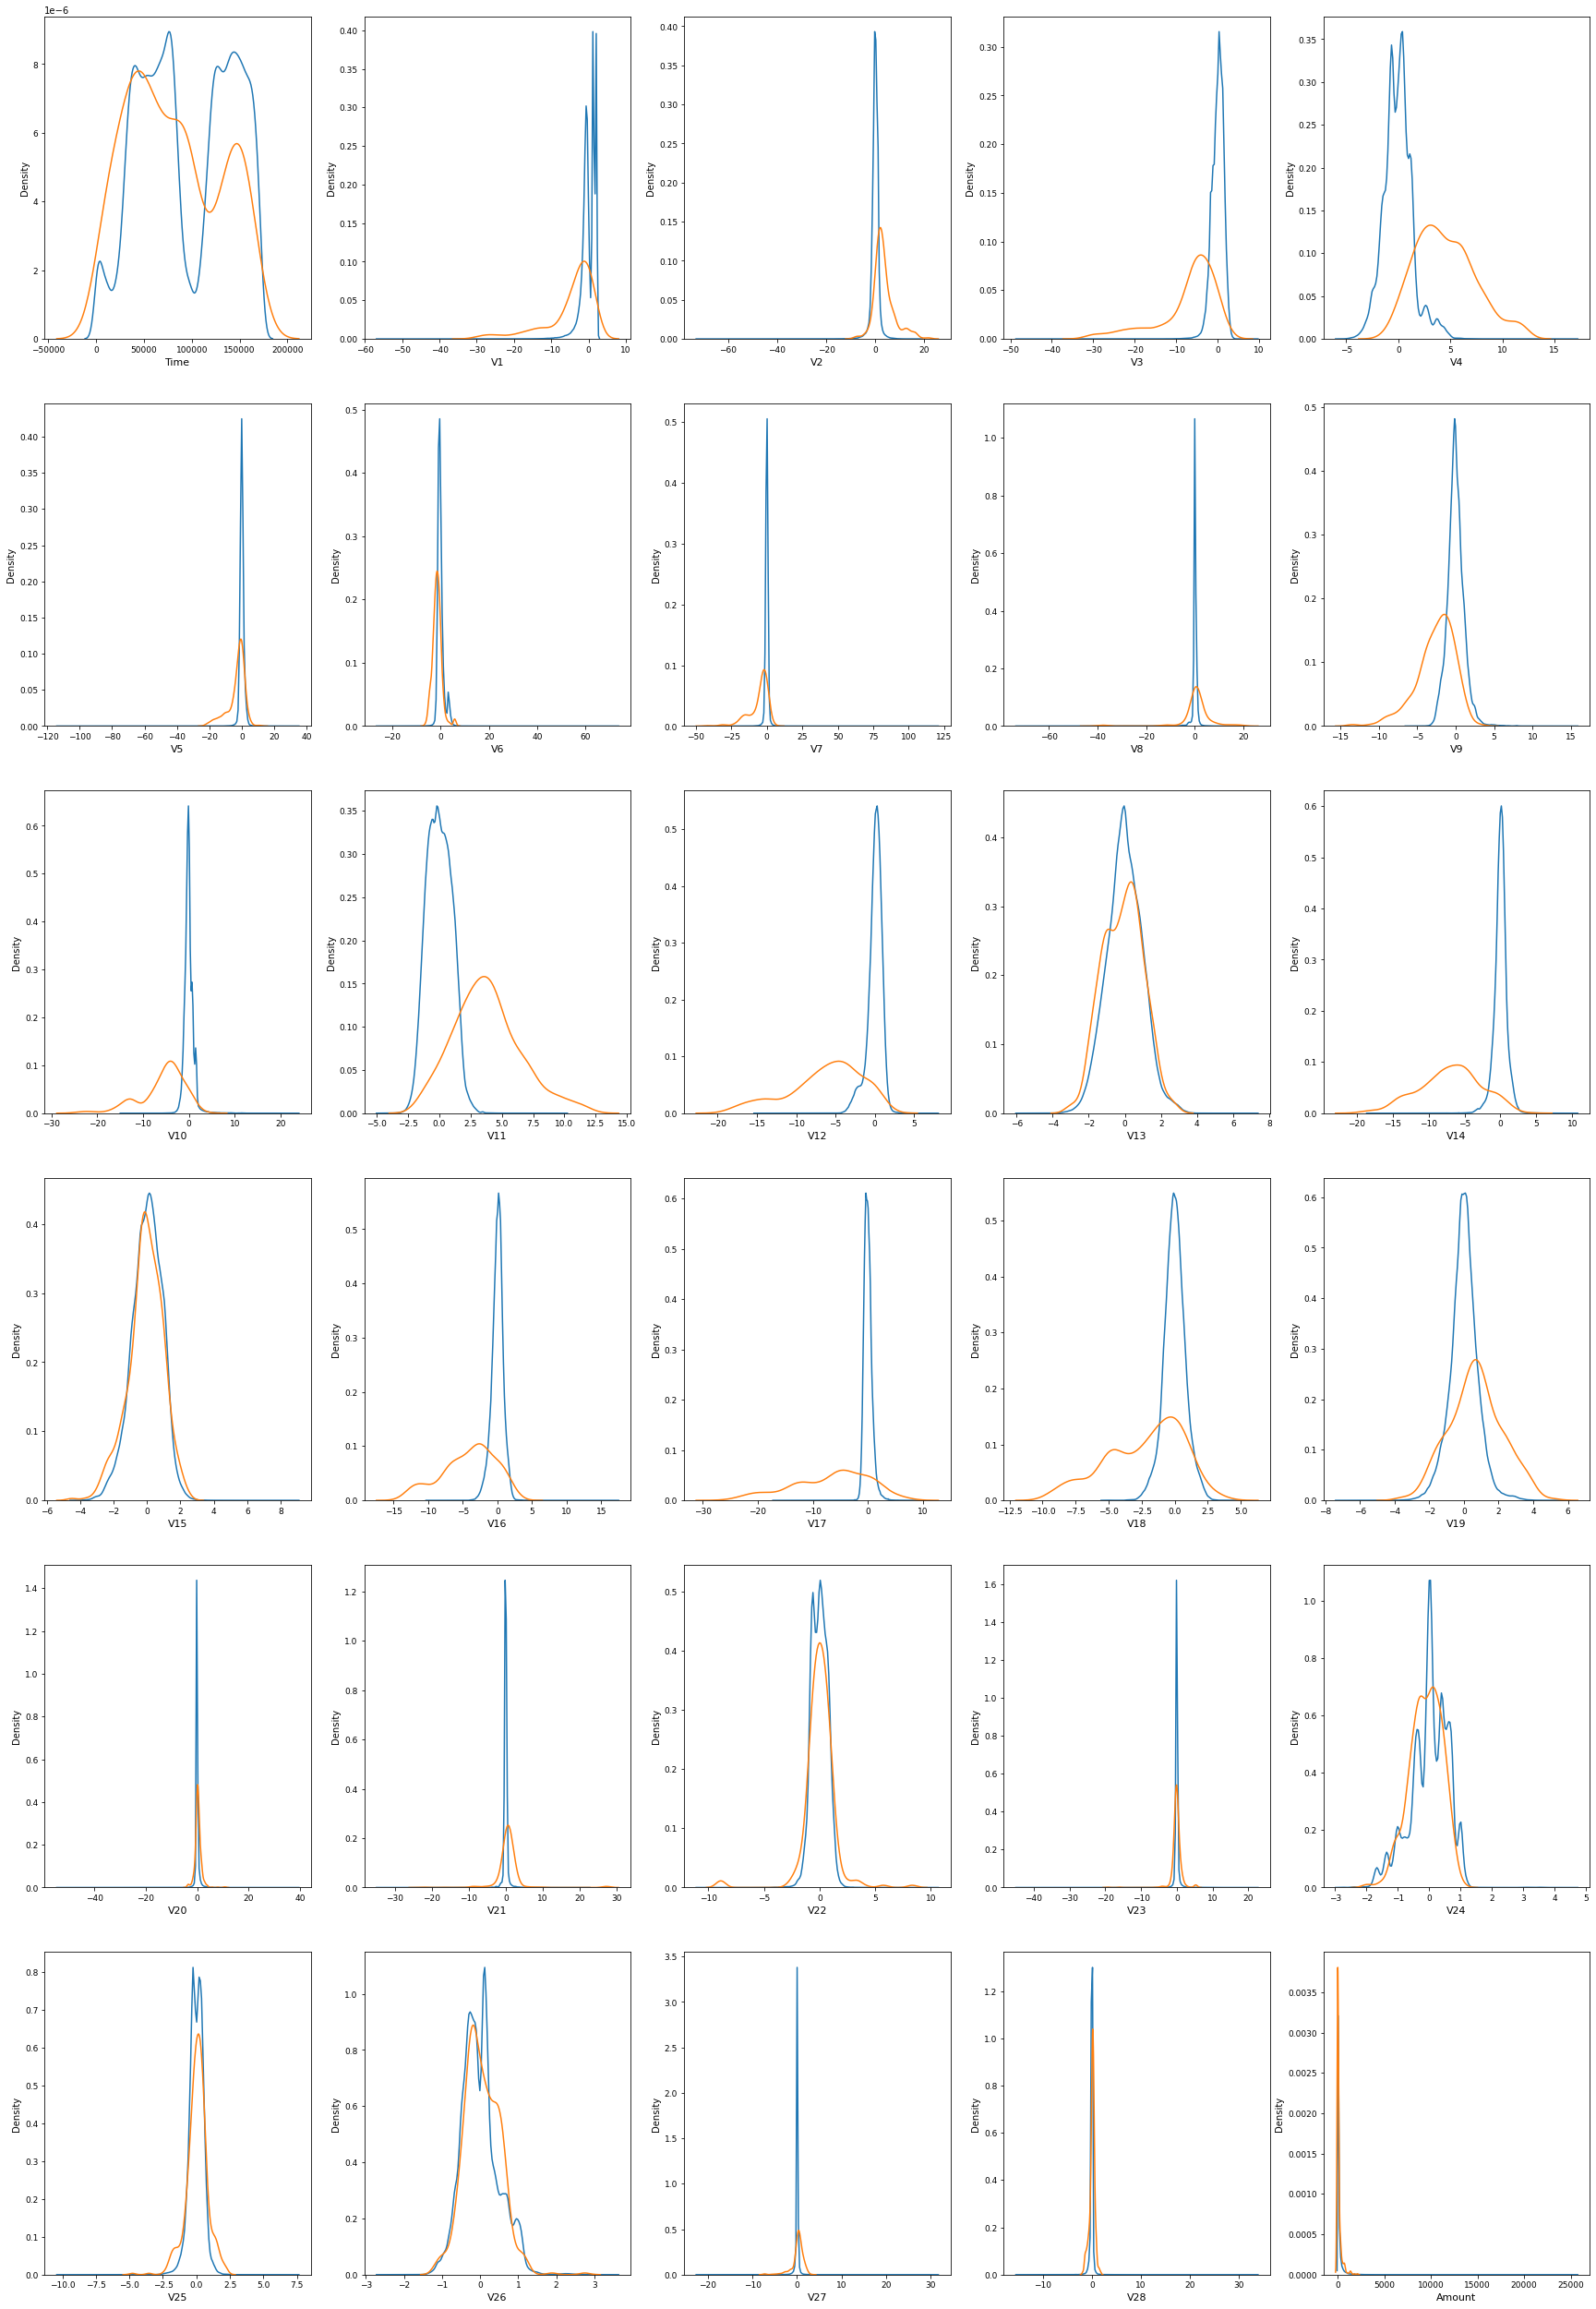

In [19]:
def feature_dist(df0,df1,label0,label1,features):
    plt.figure()
    fig,ax=plt.subplots(6,5,figsize=(30,45))
    i=0
    for ft in features:
        i+=1
        plt.subplot(6,5,i)
        # plt.figure()
        sns.distplot(df0[ft], hist=False,label=label0)
        sns.distplot(df1[ft], hist=False,label=label1)
        plt.xlabel(ft, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=9)
        plt.tick_params(axis='y', labelsize=9)
    plt.show()

t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]
features = df.columns.values[:30]
feature_dist(t0,t1 ,'Normal', 'Busted', features)

### Checking for outliers in distribution

<Figure size 432x288 with 0 Axes>

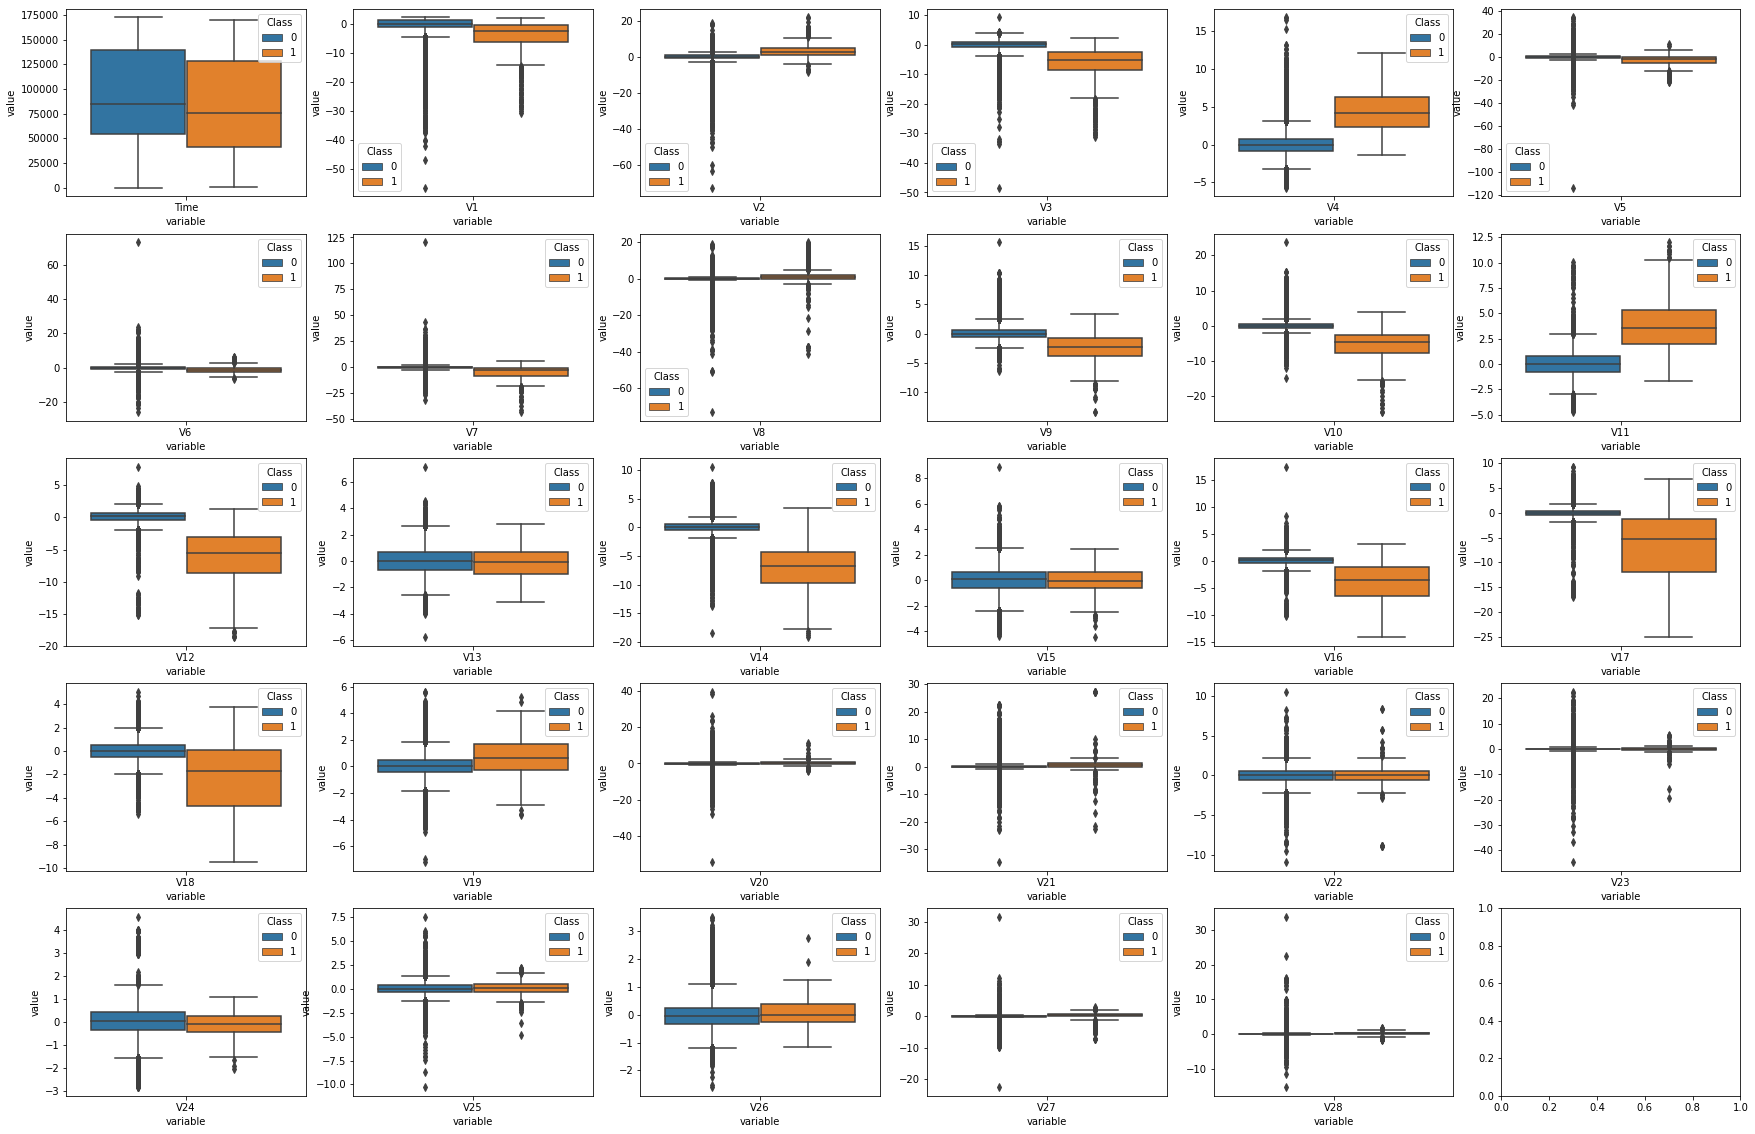

In [20]:
def showboxplot(df,features):
    melted=[]
    plt.figure()
    fig,ax=plt.subplots(5,6,figsize=(30,20))
    i=0
    for n in features:
        melted.insert(i,pd.melt(df,id_vars = "Class",value_vars = [n]))
        i+=1
    for s in np.arange(1,len(melted)):
        plt.subplot(5,6,s)
        sns.boxplot(x = "variable", y = "value", hue="Class",data= melted[s-1])
    plt.show()


showboxplot(df,df.columns.values[:-1])

Multiple outliers were found and it will effect the accuracy of the prediction if outliers are not removed.

In [12]:
X=df.drop(['Class'],axis=1)
y=df['Class']

## Feature Selection

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [14]:
X = df.iloc[:,df.columns != 'Class']
y = df.Class

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5, stratify=y)

In [16]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Logistic Regression Model

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [19]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100))

The Accuracy for Training Set is 99.91968224011939


In [20]:
test_acc = accuracy_score(y_test, y_test)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 100.0


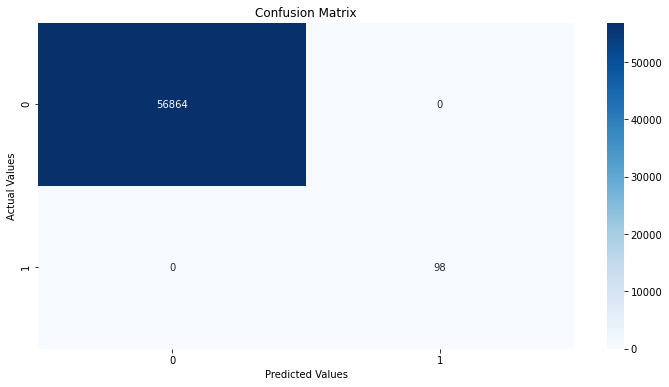

In [21]:
cm=confusion_matrix(y_test,y_test)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

# KNN Model

In [22]:
k = 3 
KNN= KNeighborsClassifier(n_neighbors=k,algorithm = 'kd_tree')
KNN

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [25]:
# Fit the model
startTime = time.time()

# this is where we train the model 
KNN.fit(X_train,y_train)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )

time: 0.7391400337219238  sec


Using the KNN model to predict some values using the test data and save the values to yhat.

In [26]:
startTime = time.time()

# this is where we make the prediction  
yhat=KNN.predict(X_test)

lapsedTime = time.time() - startTime
print('time:',lapsedTime,' sec' )
yhat[0:5]

time: 1.6149101257324219  sec


array([0, 0, 0, 0, 0])

### KNN model accuracy

In [28]:
np.mean(yhat==y_test)

0.9984902215512096

In [29]:
target_names = ['not fraud', 'fraud ']

In [30]:
print("confusion matrix:")
print( confusion_matrix(yhat,y_test))

confusion matrix:
[[56862    84]
 [    2    14]]


In [32]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = 3*cm.max()/4
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



Confusion matrix, without normalization
[[56862    84]
 [    2    14]]


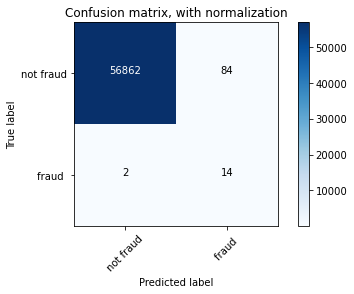

In [35]:
plot_confusion_matrix(confusion_matrix(yhat,y_test), classes=target_names,title='Confusion matrix, with normalization')

### Calculating Precision

In [38]:
prf1=precision_recall_fscore_support(y_test,yhat)
acc=accuracy_score(y_test,yhat)
acc

0.9984902215512096

In [40]:
def pretty_metrics(precision_recall_fscore=0,accuracy_score=0):
    if precision_recall_fscore==0:
        metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
        return metric_dict
    #This function prints out the precision, recall,f-score and accuracy is also saves the result to a dictionary 
    metric_dict={'accuracy':[],'precision':[],'recall':[],'F1':[]}
    metric_dict['accuracy']=accuracy_score
    metric_dict['precision']=precision_recall_fscore[0][1]
    metric_dict['recall']=precision_recall_fscore[1][1]
    metric_dict['F1']=precision_recall_fscore[2][1]
    [print(key,value) for key, value in metric_dict.items()]
    return metric_dict

In [41]:
metric=pretty_metrics(precision_recall_fscore=prf1,accuracy_score=acc)

accuracy 0.9984902215512096
precision 0.875
recall 0.14285714285714285
F1 0.2456140350877193
